In [1]:
import numpy as np

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib widget
from tqdm.autonotebook import tqdm


<ipython-input-2-735d02c21c99>:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Load data

In [3]:
emgA, emgB = np.load('EMG_SAMPLE.npy')[1000:59000, :].astype('float').T
sfreq = 1000 # Hz - sampling rate

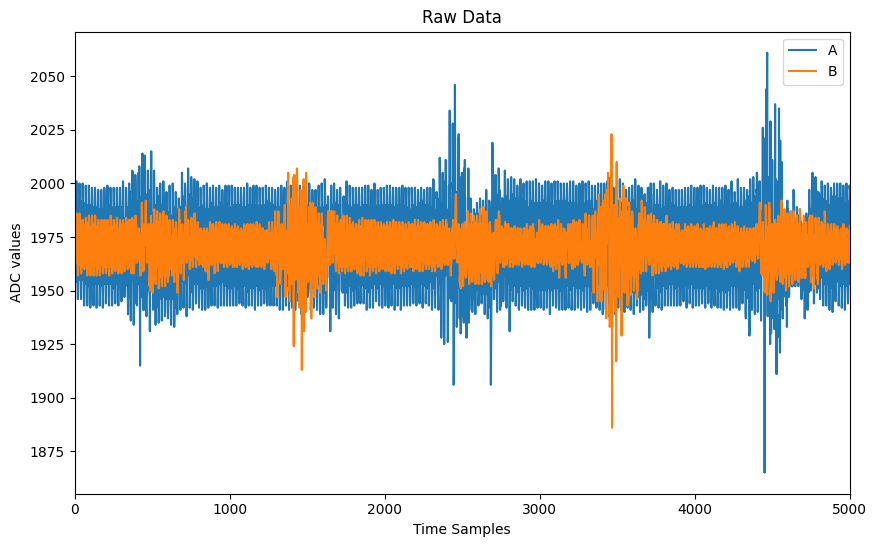

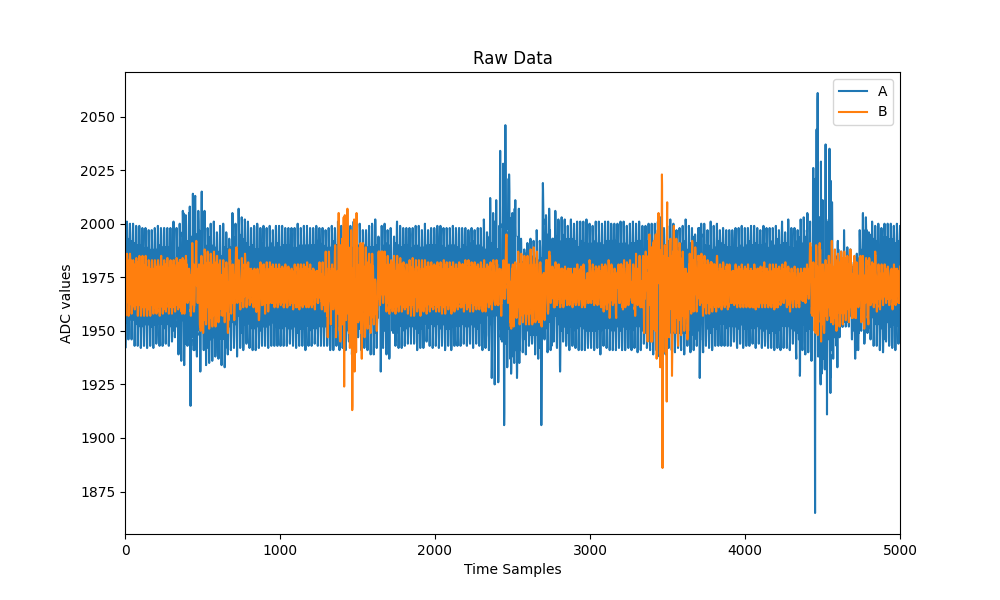

In [4]:
plt.figure(figsize=(10,6))
plt.plot(emgA)
plt.plot(emgB)
plt.legend('AB')
plt.xlabel('Time Samples')
plt.ylabel('ADC values')

plt.xlim(0, 5*sfreq)
plt.title('Raw Data')

display(plt.gcf())

# MNE Preprocessing

In [5]:
import mne

## Filtering out line noise

In [6]:
[emgA, emgB] = mne.filter.notch_filter([emgA, emgB], Fs = sfreq, freqs = np.arange(50, sfreq/2, 50), notch_widths=2)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


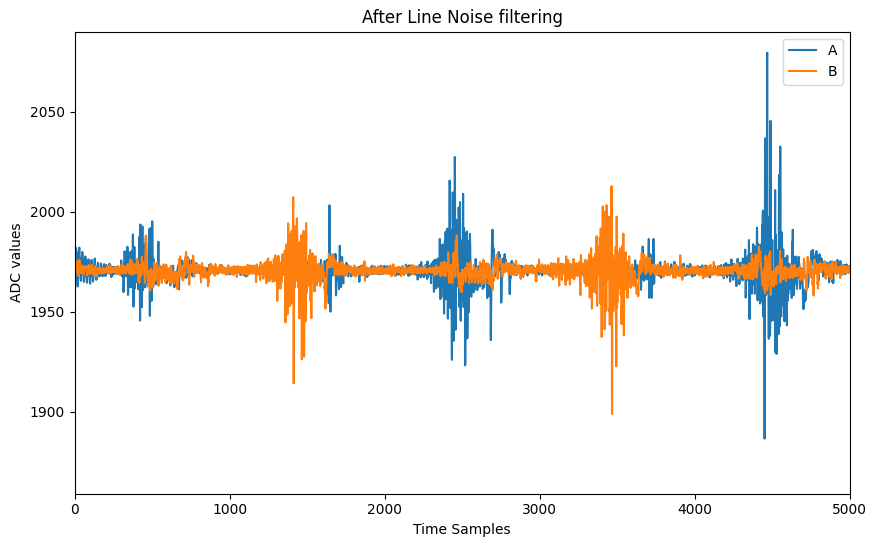

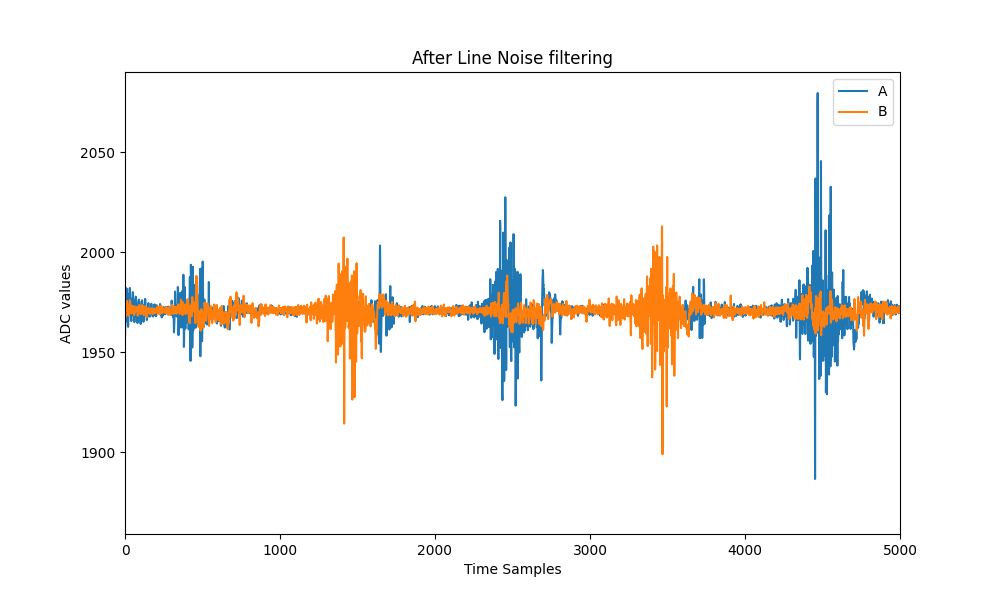

In [7]:
plt.figure(figsize=(10,6))
plt.plot(emgA)
plt.plot(emgB)
plt.legend('AB')
plt.xlabel('Time Samples')
plt.ylabel('ADC values')

plt.xlim(0, 5*sfreq)
plt.title('After Line Noise filtering')
display(plt.gcf())

## Filtering out midpoint

In [8]:
[emgA, emgB] = mne.filter.filter_data([emgA, emgB], sfreq = sfreq, l_freq=10, h_freq=None)

Setting up high-pass filter at 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 10.00
- Lower transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 8.75 Hz)
- Filter length: 1321 samples (1.321 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


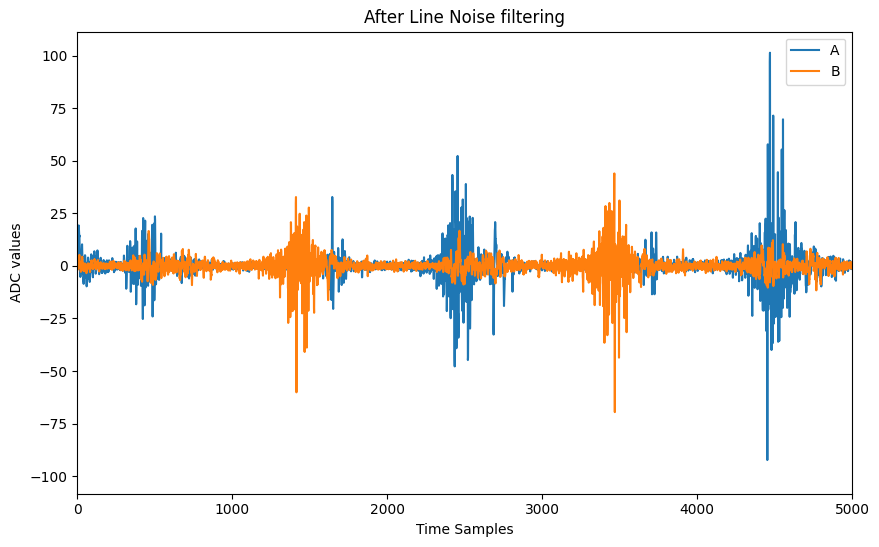

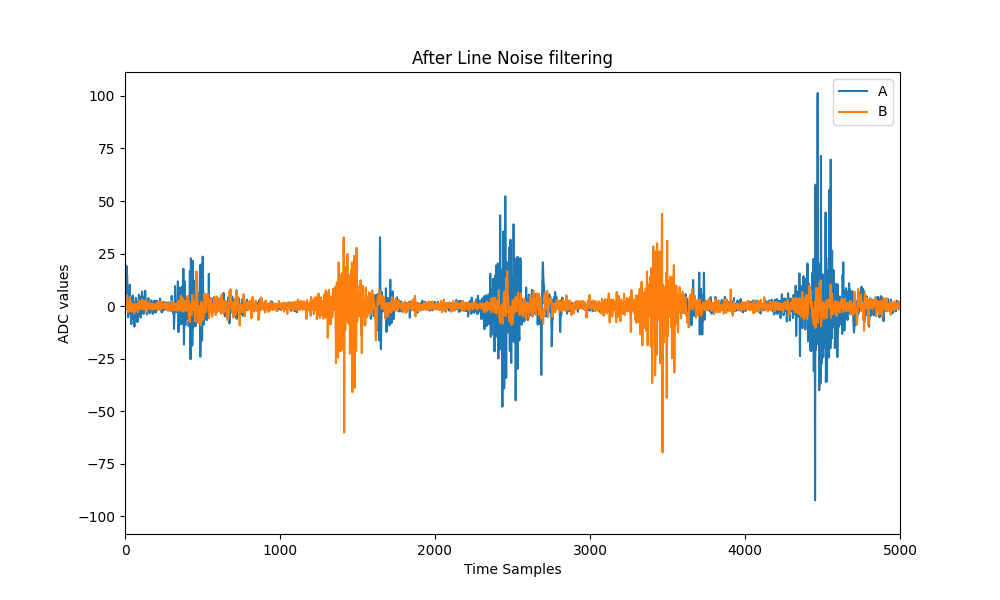

In [9]:
plt.figure(figsize=(10,6))
plt.plot(emgA)
plt.plot(emgB)
plt.legend('AB')
plt.xlabel('Time Samples')
plt.ylabel('ADC values')

plt.xlim(0, 5*sfreq)
plt.title('After Line Noise filtering')
display(plt.gcf())

# Envelope calculation

In [10]:
import scipy

In [11]:


emgA_env = np.abs(scipy.signal.hilbert(emgA))
emgB_env = np.abs(scipy.signal.hilbert(emgB))

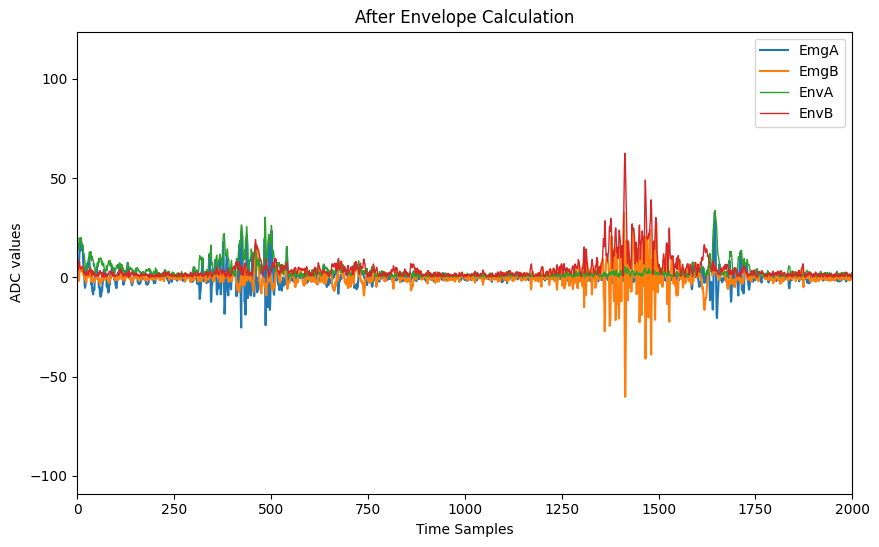

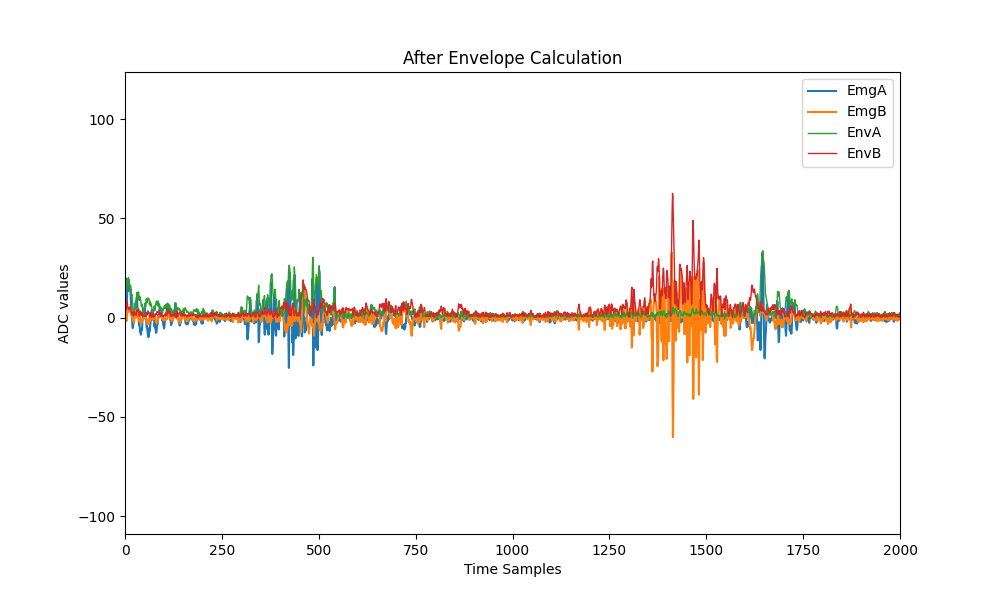

In [12]:
plt.figure(figsize=(10,6))
plt.plot(emgA)
plt.plot(emgB)

plt.plot(emgA_env,  lw=1)
plt.plot(emgB_env,  lw=1)

plt.legend(['EmgA', 'EmgB', 'EnvA', 'EnvB'])
plt.xlabel('Time Samples')
plt.ylabel('ADC values')

plt.xlim(0, 2*sfreq)
plt.title('After Envelope Calculation')
display(plt.gcf())